<a href="https://colab.research.google.com/github/PaulQuezada/MachineLearning/blob/main/NaiveBayes/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

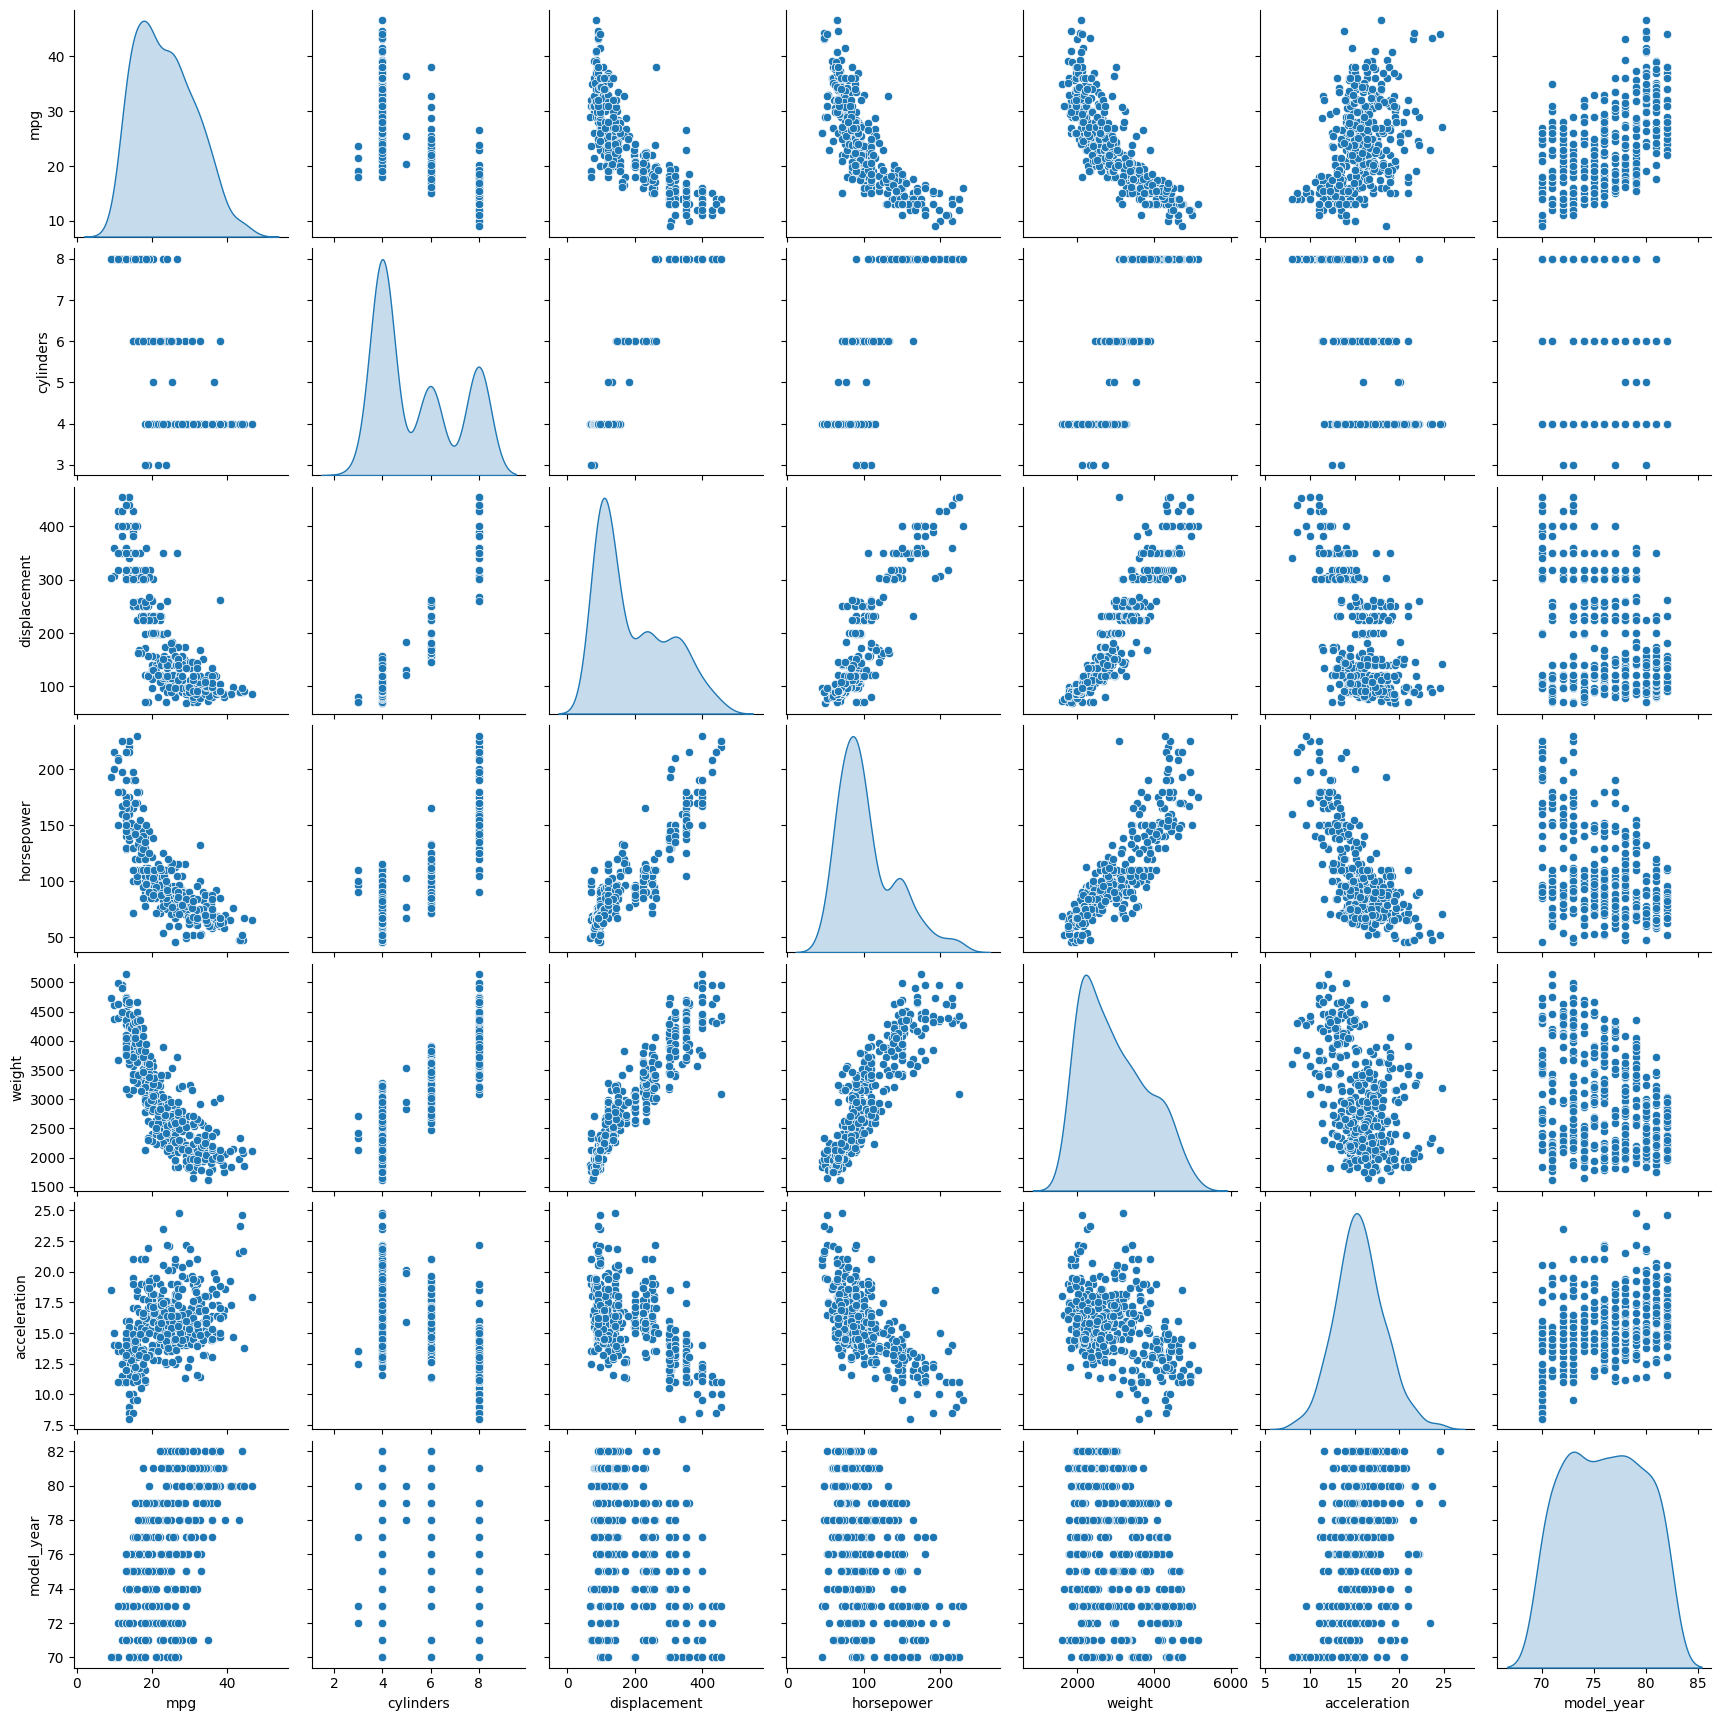

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos mpg
mpg = sns.load_dataset("mpg")

# Crear un scatterplot matrix
sns.pairplot(mpg, diag_kind='kde')


2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<ipython-input-6-04ded3890a56>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mpg.corr()


<Axes: >

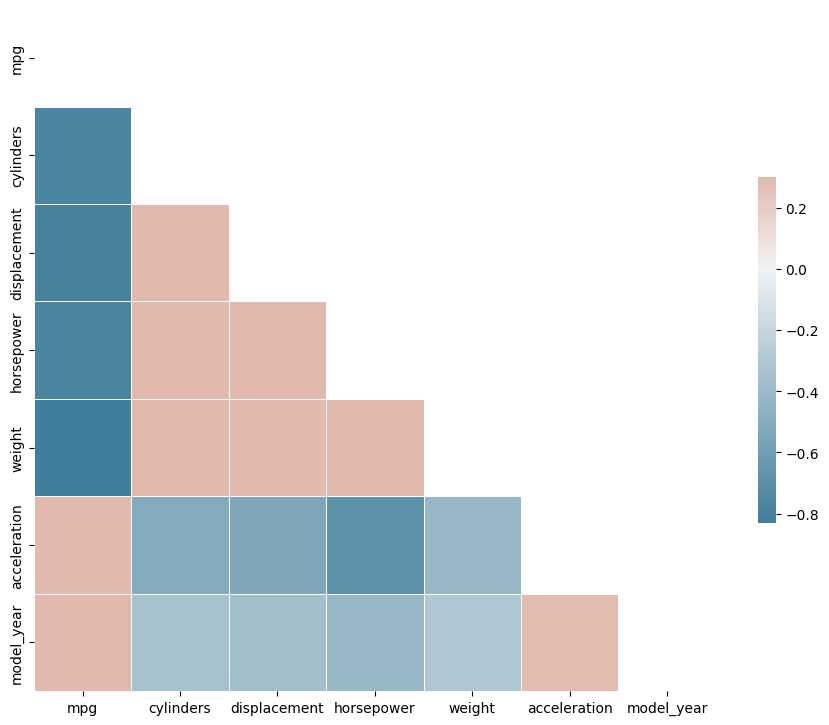

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlacion
corr = mpg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

d = sns.load_dataset("mpg")
d = d.dropna(subset=['horsepower', 'displacement']) # Contiene valores Nan y arroja error por eso lo dropeamos
# V. independiente
X = d[['horsepower']]
# V. dependiente
y = d['displacement']

# Valores de entrenamiento y test-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construimos y entrenamos
model = LinearRegression()
model.fit(X_train, y_train)

import warnings
warnings.filterwarnings('ignore')


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [ ]:
 # Evaluamos el modelo q enbtrenamos
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficiente:", model.coef_)
print("Error cuadratico medio (MSE):", mse)
print("Raiz del error cuadrático medio (RMSE):", rmse)

Coeficiente: [2.42044921]
Error cuadratico medio (MSE): 1957.159617205473
Raiz del error cuadrático medio (RMSE): 44.23979675818451


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


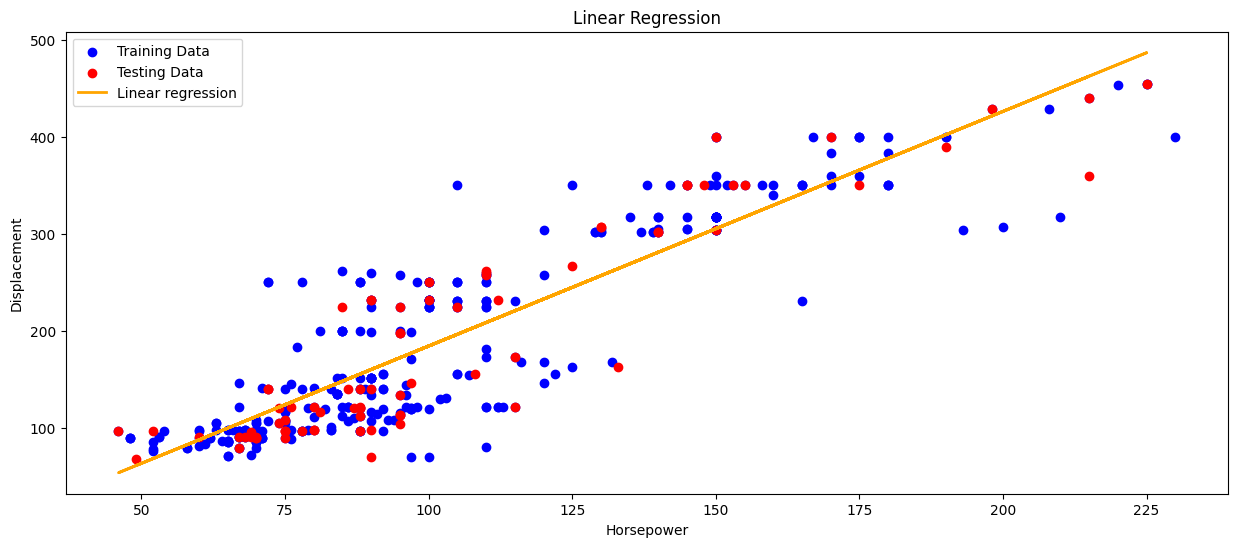

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Linear regression')
plt.xlabel('Horsepower')
plt.ylabel('Displacement')
plt.title('Linear Regression')
plt.legend()
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.